In [2]:
import pandas as pd

# Load dataset
df = pd.read_csv('fitness_health_data.csv')

# Display the first few rows
print(df.head())

# Display dataset information
print(df.info())

# Display basic statistics
print(df.describe())


         Date  User_ID  Steps  Calories  Distance  Active_Minutes  Heart_Rate  \
0  2024-01-01        1   5423      3481      4.34             113          78   
1  2024-01-02        1   6205      2902      4.96              57          62   
2  2024-01-03        1   3330      2272      2.66              93          85   
3  2024-01-04        1  12912      2741     10.33              53          60   
4  2024-01-05        1  14281      2635     11.42              68          60   

   Sleep_Duration  
0             5.5  
1             8.1  
2             5.0  
3             4.1  
4             4.0  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Date            1500 non-null   object 
 1   User_ID         1500 non-null   int64  
 2   Steps           1500 non-null   int64  
 3   Calories        1500 non-null   int64  
 4   Distance    

In [3]:
# Summary statistics for numerical columns
summary_stats = df.describe()
print(summary_stats)


           User_ID         Steps     Calories     Distance  Active_Minutes  \
count  1500.000000   1500.000000  1500.000000  1500.000000     1500.000000   
mean     25.500000  11512.940000  2467.753333     9.210387       75.382000   
std      14.435682   4946.757058   571.581004     3.957503       26.400317   
min       1.000000   3012.000000  1500.000000     2.410000       30.000000   
25%      13.000000   7189.750000  1966.000000     5.750000       53.000000   
50%      25.500000  11483.000000  2468.500000     9.185000       76.000000   
75%      38.000000  15743.500000  2958.250000    12.592500       98.000000   
max      50.000000  20000.000000  3497.000000    16.000000      120.000000   

        Heart_Rate  Sleep_Duration  
count  1500.000000     1500.000000  
mean     80.404667        6.461800  
std      12.029799        1.455642  
min      60.000000        4.000000  
25%      70.000000        5.200000  
50%      81.000000        6.450000  
75%      91.000000        7.700000  
m

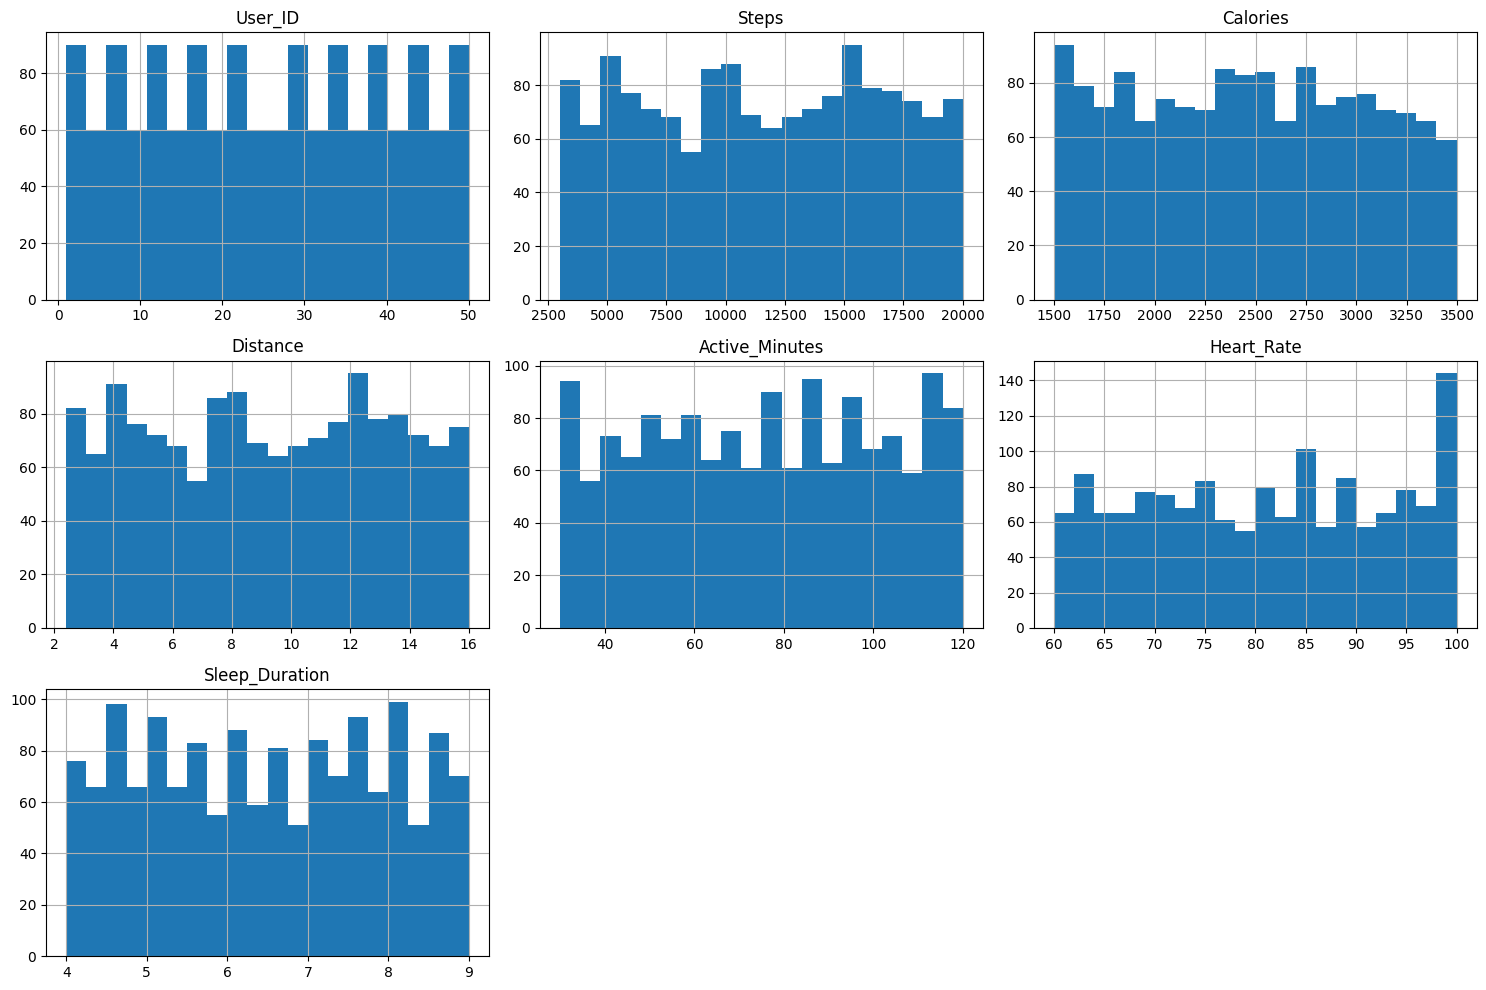

In [4]:
import matplotlib.pyplot as plt

# Histogram for numerical columns
df.hist(bins=20, figsize=(15, 10))
plt.tight_layout()
plt.show()


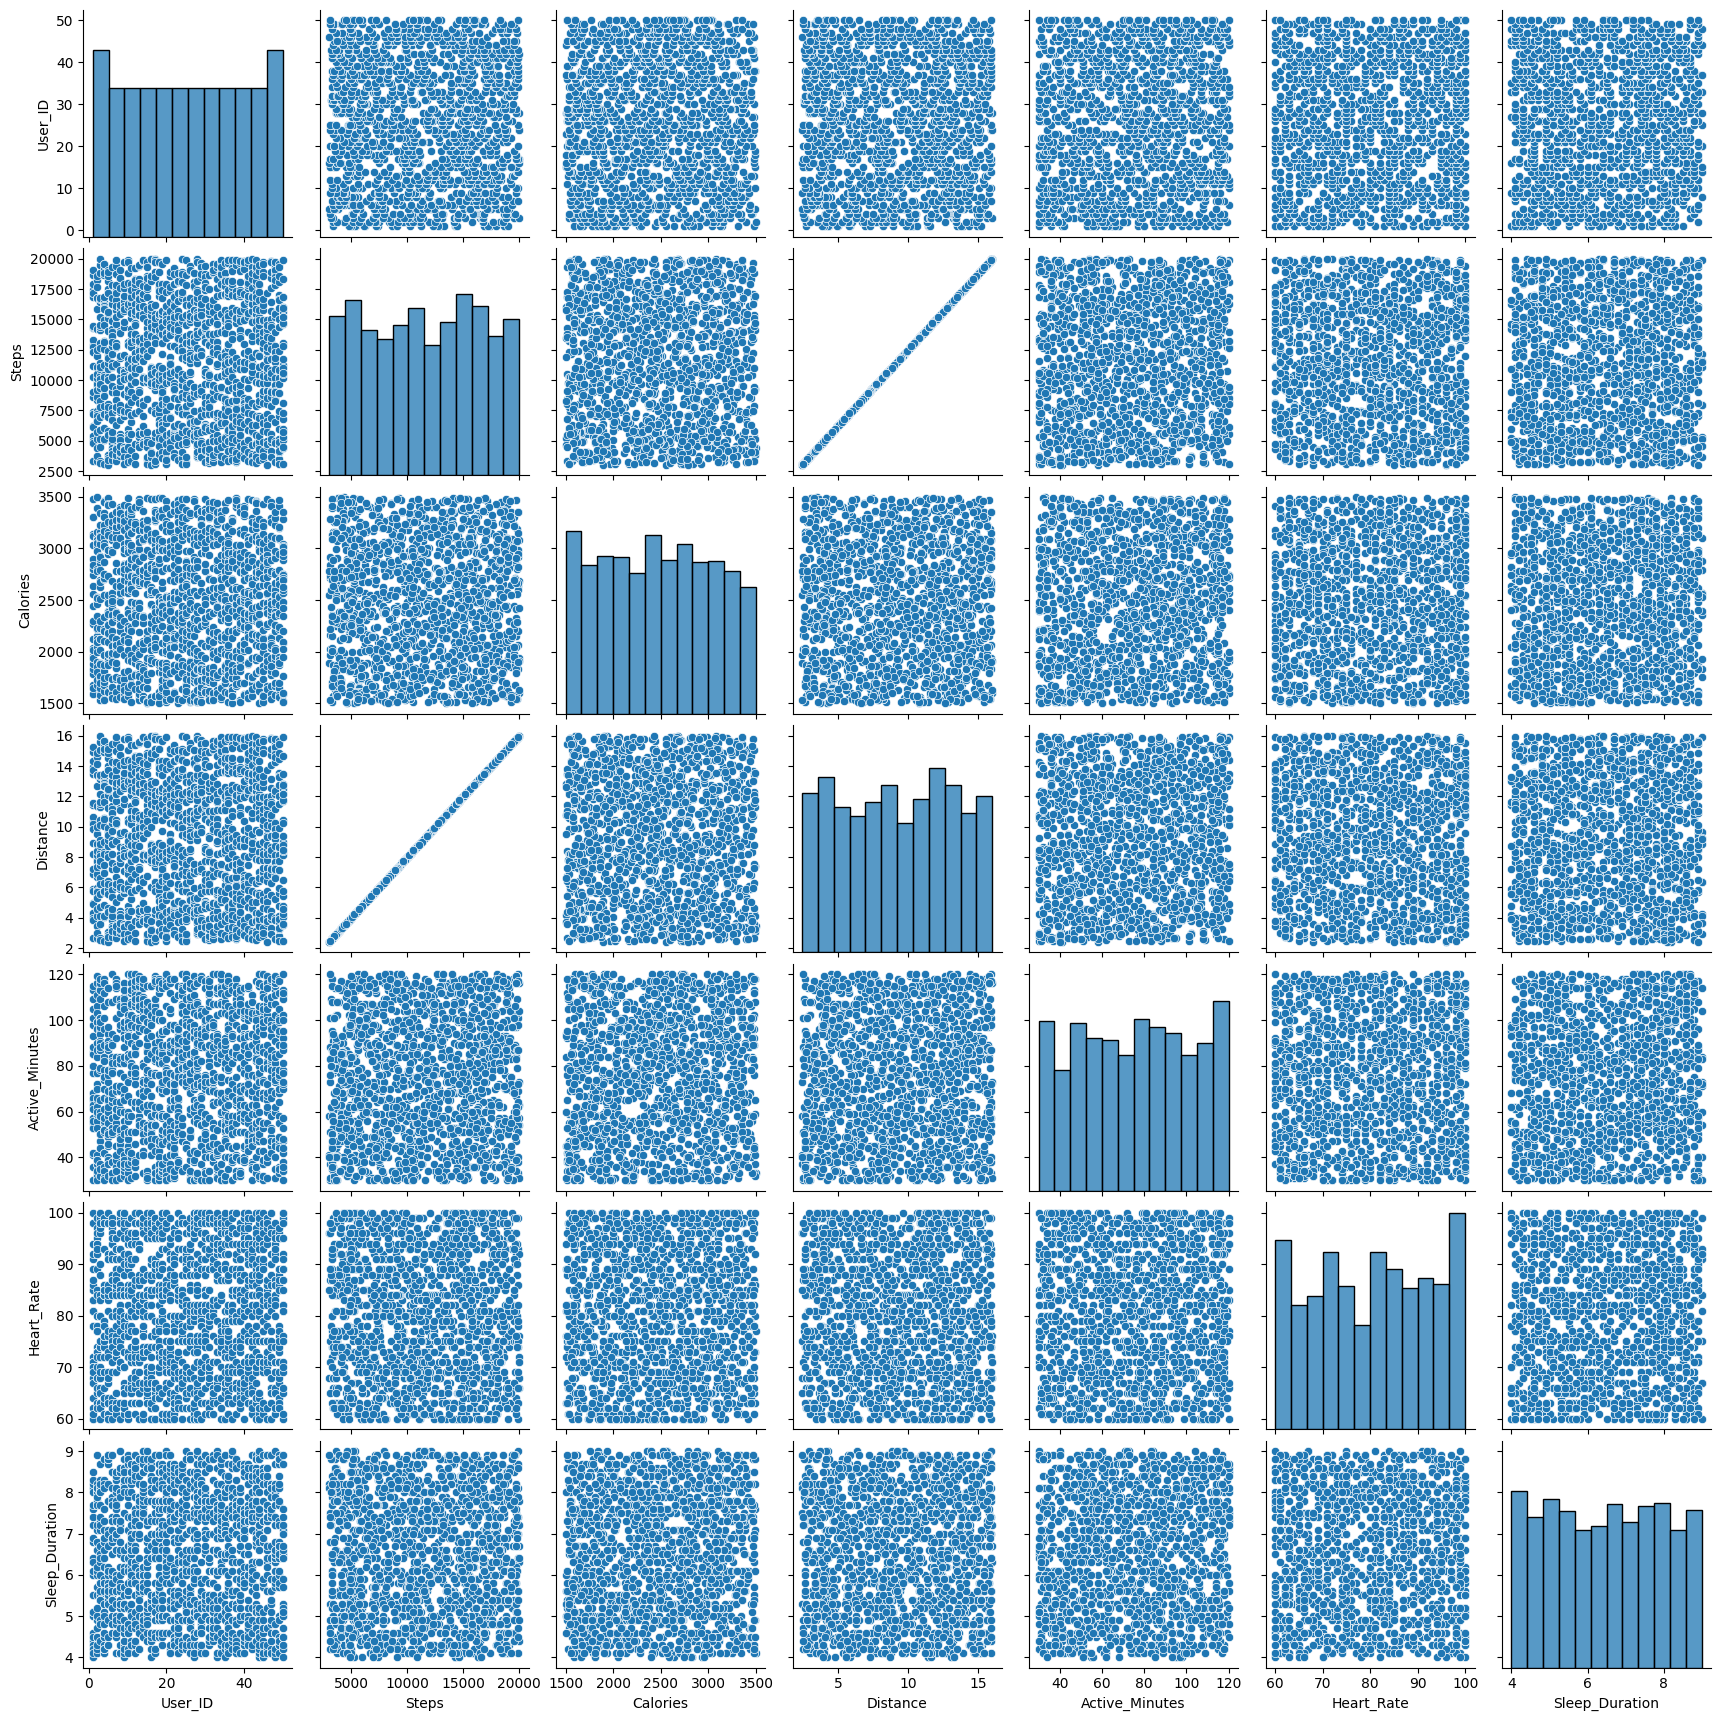

In [5]:
import seaborn as sns

# Pair plot to see relationships between features
sns.pairplot(df)
plt.show()


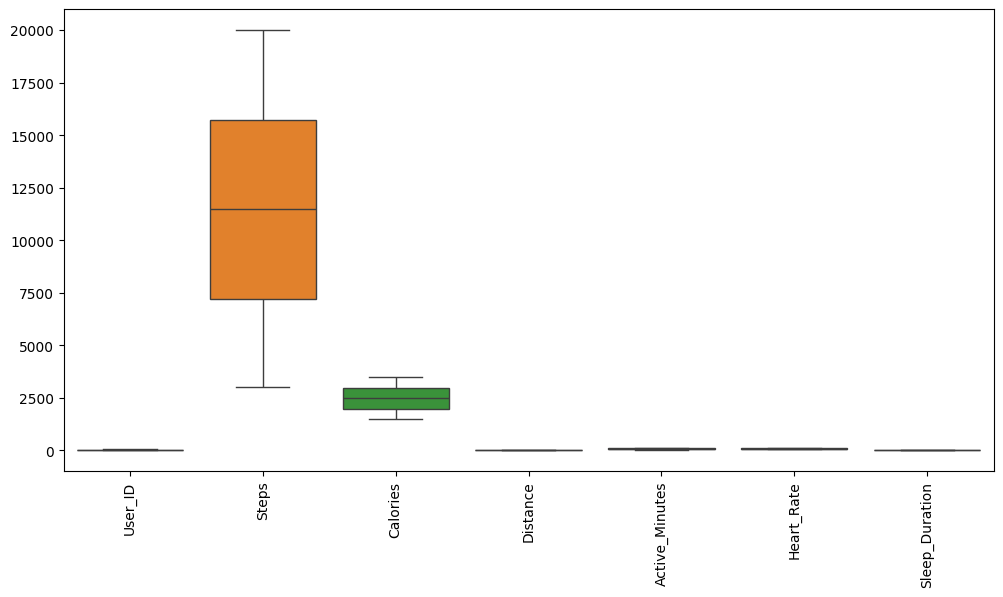

In [6]:
# Box plot to identify outliers
plt.figure(figsize=(12, 6))
sns.boxplot(data=df)
plt.xticks(rotation=90)
plt.show()


In [9]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Load dataset
df = pd.read_csv('fitness_health_data.csv')

# Feature selection
features = ['Steps', 'Distance', 'Active_Minutes']
target = 'Calories'

X = df[features]
y = df[target]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model training
model = LinearRegression()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluation
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

# Display coefficients
print("Coefficients:", model.coef_)


Mean Squared Error: 320402.1202534465
Coefficients: [-1.18215741e+00  1.48025837e+03  6.65886514e-01]


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


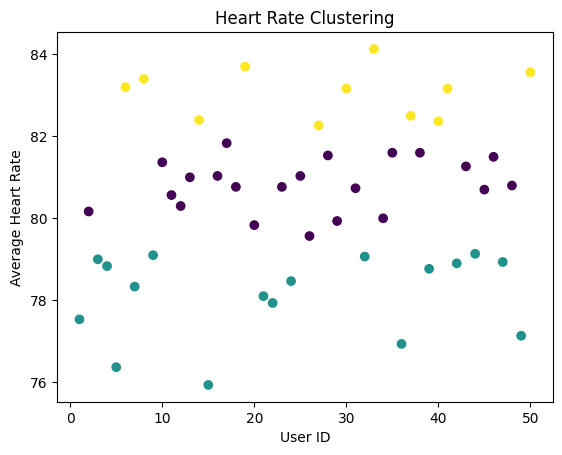

In [10]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv('fitness_health_data.csv')

# Extract features
heart_rate = df[['User_ID', 'Heart_Rate']].groupby('User_ID').mean().reset_index()

# K-means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
heart_rate['Cluster'] = kmeans.fit_predict(heart_rate[['Heart_Rate']])

# Plotting
plt.scatter(heart_rate['User_ID'], heart_rate['Heart_Rate'], c=heart_rate['Cluster'], cmap='viridis')
plt.xlabel('User ID')
plt.ylabel('Average Heart Rate')
plt.title('Heart Rate Clustering')
plt.show()
